# 载入数据

In [2]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
path = 'C:/Users/hp/Desktop/data/'
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path+'used_car_testA_20200313.csv', sep=' ')

name - 汽车编码
regDate - 汽车注册时间
model - 车型编码
brand - 品牌
bodyType - 车身类型
fuelType - 燃油类型
gearbox - 变速箱
power - 汽车功率
kilometer - 汽车行驶公里
notRepairedDamage - 汽车有尚未修复的损坏
regionCode - 看车地区编码
seller - 销售方
offerType - 报价类型
creatDate - 广告发布时间
price - 汽车价格
v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

v_0', v_1, v_2, ..., v_14 这些变量代表从汽车的评论、标签等大量信息中通过某种嵌入（embedding）技术得到的向量元素。这种嵌入向量通常用于将非数值型数据（如文本）转换为数值型数据，以便机器学习模型能够处理。这些向量中的每个元素（如v_0', v_1等）都捕捉了原始数据中的某些特征或信息，但具体含义是隐式的，因为它们是通过算法自动学习得到的，而不是人为直接定义的。

嵌入向量的作用
特征降维：嵌入向量可以将高维的文本数据（如单词、句子或更复杂的文本）映射到低维的连续向量空间中，从而减少计算复杂性和提高模型效率。
捕捉语义信息：在向量空间中，相似的文本（在语义上）会被映射到相近的位置，这使得模型能够理解和利用文本之间的语义关系。
支持复杂的机器学习模型：嵌入向量作为输入特征，可以支持深度学习等复杂模型，从而在汽车评论分析、情感分析、推荐系统等任务中取得更好的性能。

匿名特征
您提到的“人工构造匿名特征”可能指的是在特征工程中，通过某种方式（如聚合、转换、编码等）从原始数据中提取的、不包含或隐藏了直接识别信息的特征。然而，在您给出的嵌入向量场景中，这些向量本身就是从原始文本数据中自动学习得到的，它们已经隐式地包含了原始数据的信息，但具体的信息内容（如具体的单词或句子）是不直接可见的，因此可以说它们在一定程度上是“匿名”的。

In [4]:
## 2) 简略观察数据(head()+shape)
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [5]:
Train_data.shape

(150000, 31)

In [6]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [7]:
Test_data.shape

(50000, 30)

# 总览数据概况

使用Train_data.describe()在Python的pandas库中时，这个方法通常会提供数据框（DataFrame）中数值型列的一些基本统计信息。这些统计信息包括：

count：非空（NA/null）值的数量。
mean：平均值。
std：标准差，衡量数据分布的离散程度。
min：最小值。
25%：第一四分位数（即25%分位数）。
50%：第二四分位数（即中位数）。
75%：第三四分位数（即75%分位数）。
max：最大值。

对于非数值型数据（如对象、类别数据），describe()方法通常会提供不同的统计量，比如count（非空值的数量），unique（唯一值的数量），top（出现频率最高的值），以及freq（该最高频率值出现的次数）。但是，请注意，默认情况下，describe()可能只显示数值型列的统计信息。

In [8]:
## 1) 通过describe()来熟悉数据的相关统计量
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [9]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


在pandas库中，info()方法是一个非常有用的工具，用于快速获取DataFrame的简要摘要信息。这包括每列的数据类型（dtype）、非空（或说非NA/null）值的数量，以及如果DataFrame有索引的话，还会显示索引的名称和类型。

当你对Train_data.info()进行调用时，它会打印出以下信息：

<class 'pandas.core.frame.DataFrame'>：这表明Train_data是一个DataFrame对象。
RangeIndex（或其他类型的索引，如MultiIndex）：这提供了关于索引的信息，包括索引的名称（如果已设置）和索引的长度（即DataFrame中的行数）。
Data columns (total N columns)：这里N是DataFrame中列的总数。
Column：每列的名称。
Non-Null Count：每列中非空（即非NA/null）值的数量。
Dtype：每列的数据类型。

这些信息对于数据预处理阶段特别有用，因为它可以帮助你快速识别哪些列可能包含缺失值（通过比较非空值的数量和总行数），哪些列的数据类型可能不符合你的分析需求（比如，你可能期望某列是数字类型，但它实际上是对象类型，这通常意味着它包含了字符串或其他非数字数据）。

In [10]:
## 2) 通过info()来熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [11]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

# 判断数据缺失和异常

在pandas中，isnull() 方法用于检测DataFrame中的缺失值（即NaN值）。当你对Train_data.isnull()进行调用时，它会返回一个与原DataFrame形状相同的布尔型DataFrame，其中True表示对应位置的值是NaN，False表示不是NaN。

接着，当你对这个布尔型DataFrame使用.sum()方法时，它会沿着每列（axis=0，这是默认的）计算True值的数量，即每列中NaN值的数量。

因此，Train_data.isnull().sum() 这行代码的作用是查看Train_data DataFrame中每列存在NaN（缺失值）的情况，并返回每列NaN值的数量。

In [12]:
## 1) 查看每列的存在nan情况
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [13]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

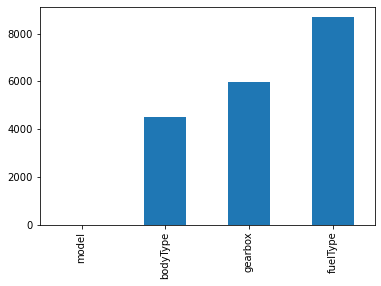

In [14]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

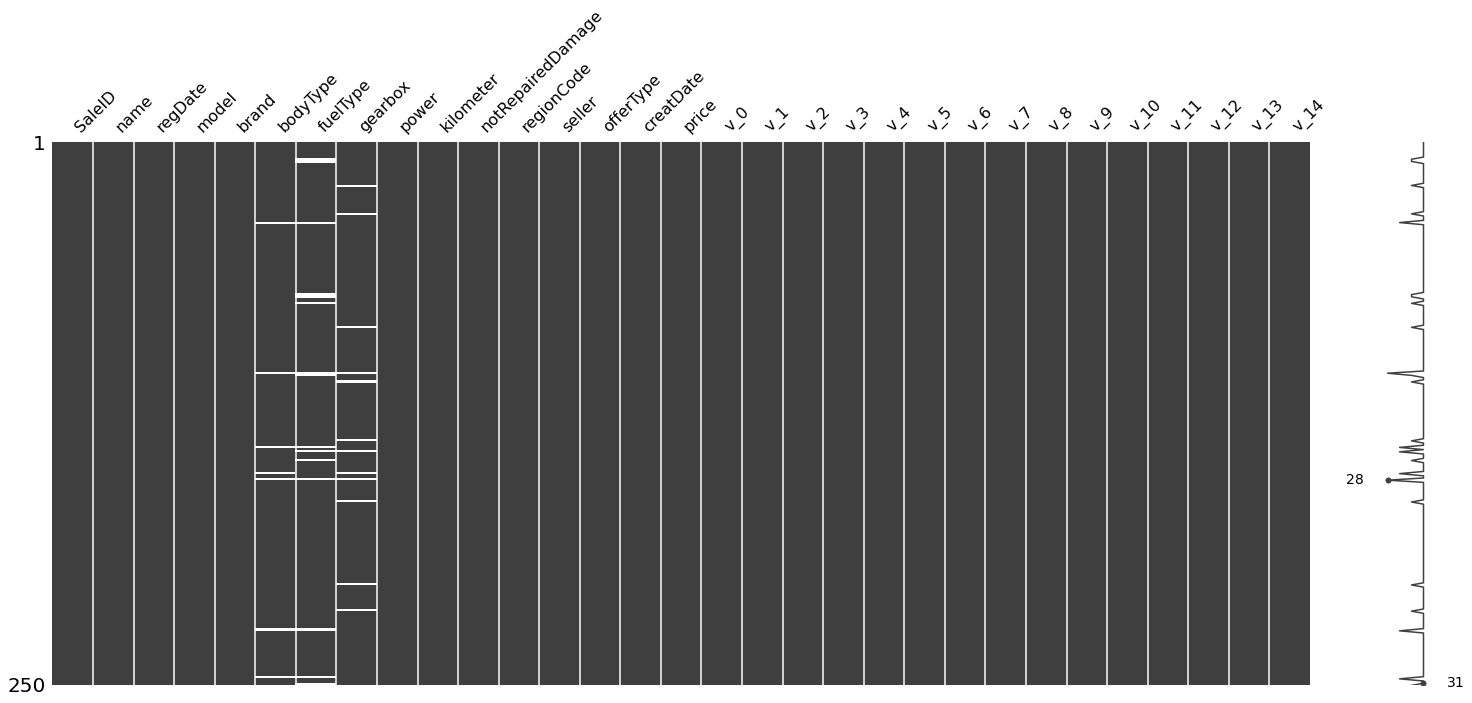

In [15]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

<AxesSubplot:>

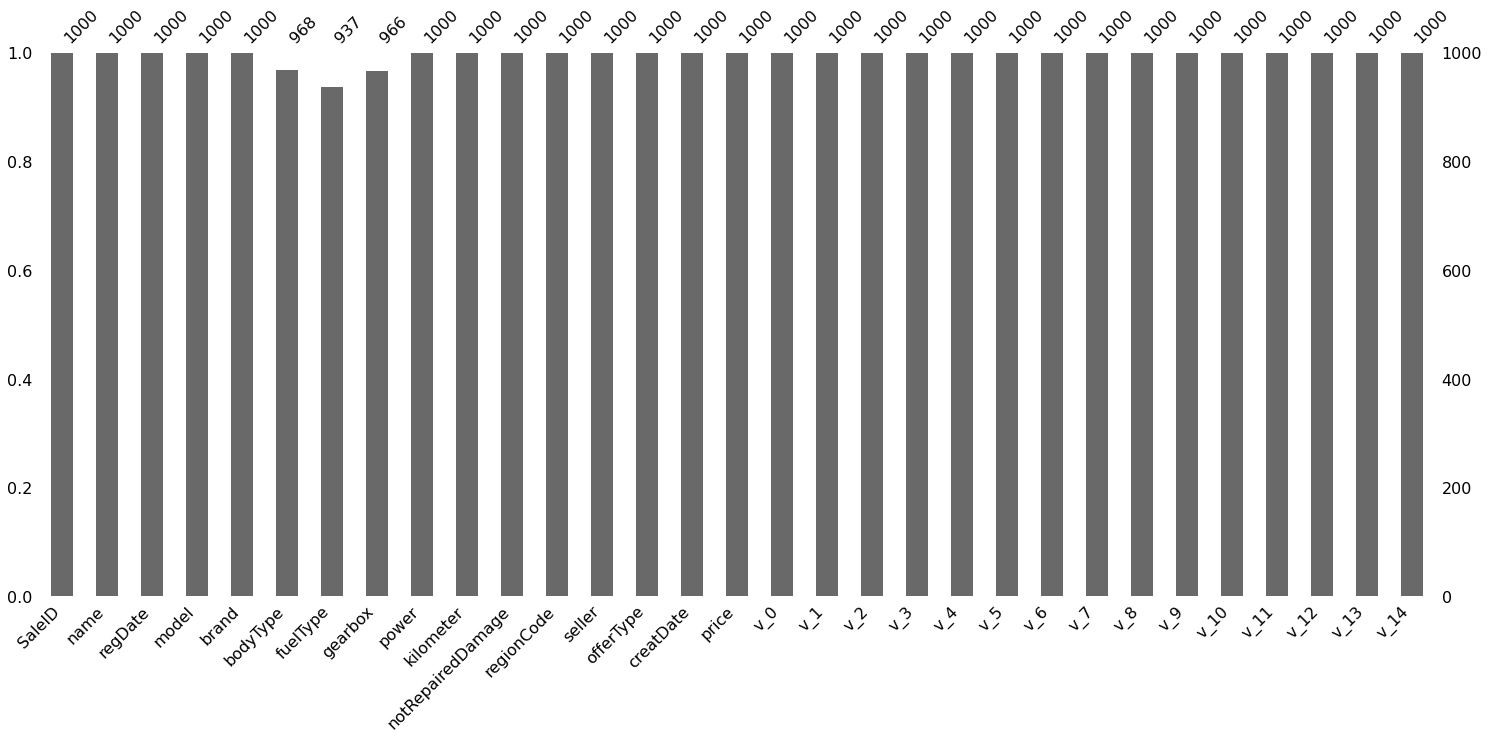

In [16]:
msno.bar(Train_data.sample(1000))

<AxesSubplot:>

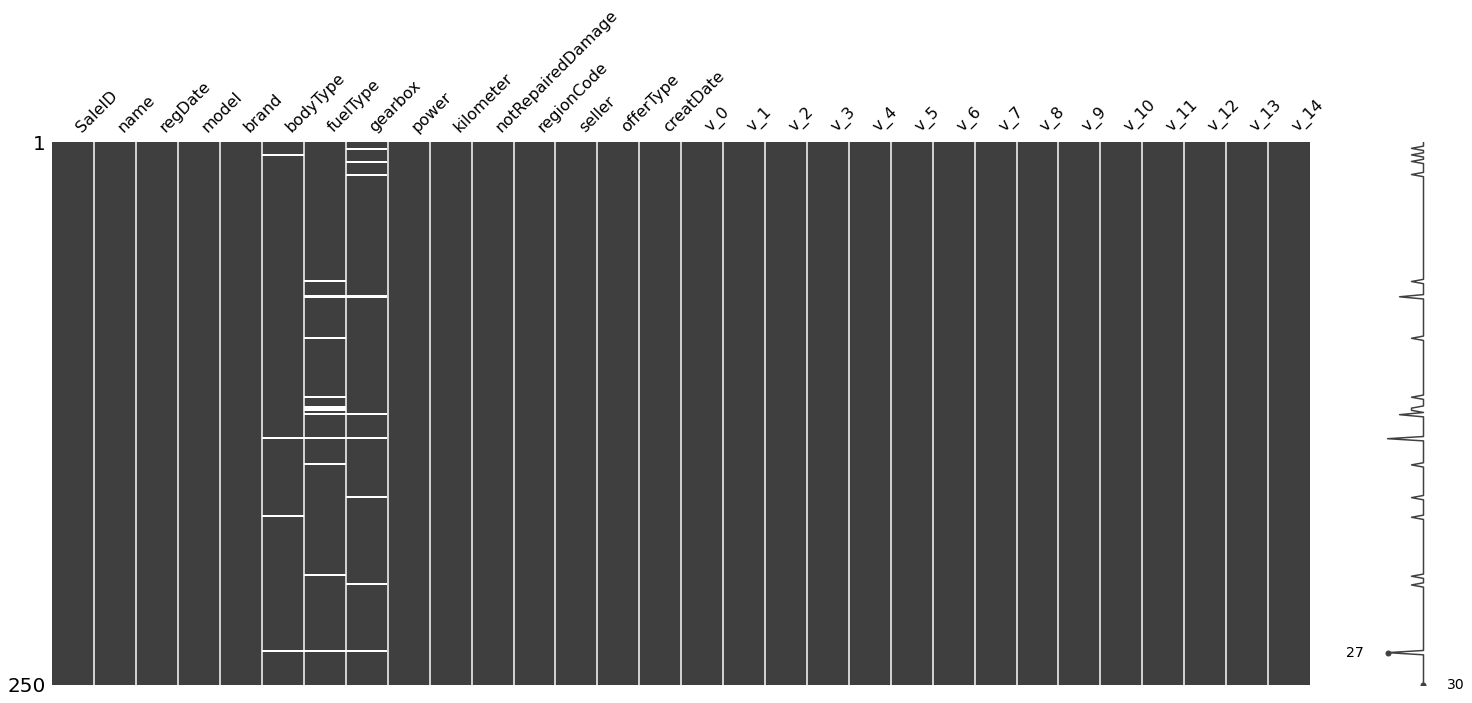

In [17]:
# 可视化看下缺省值
msno.matrix(Test_data.sample(250))

<AxesSubplot:>

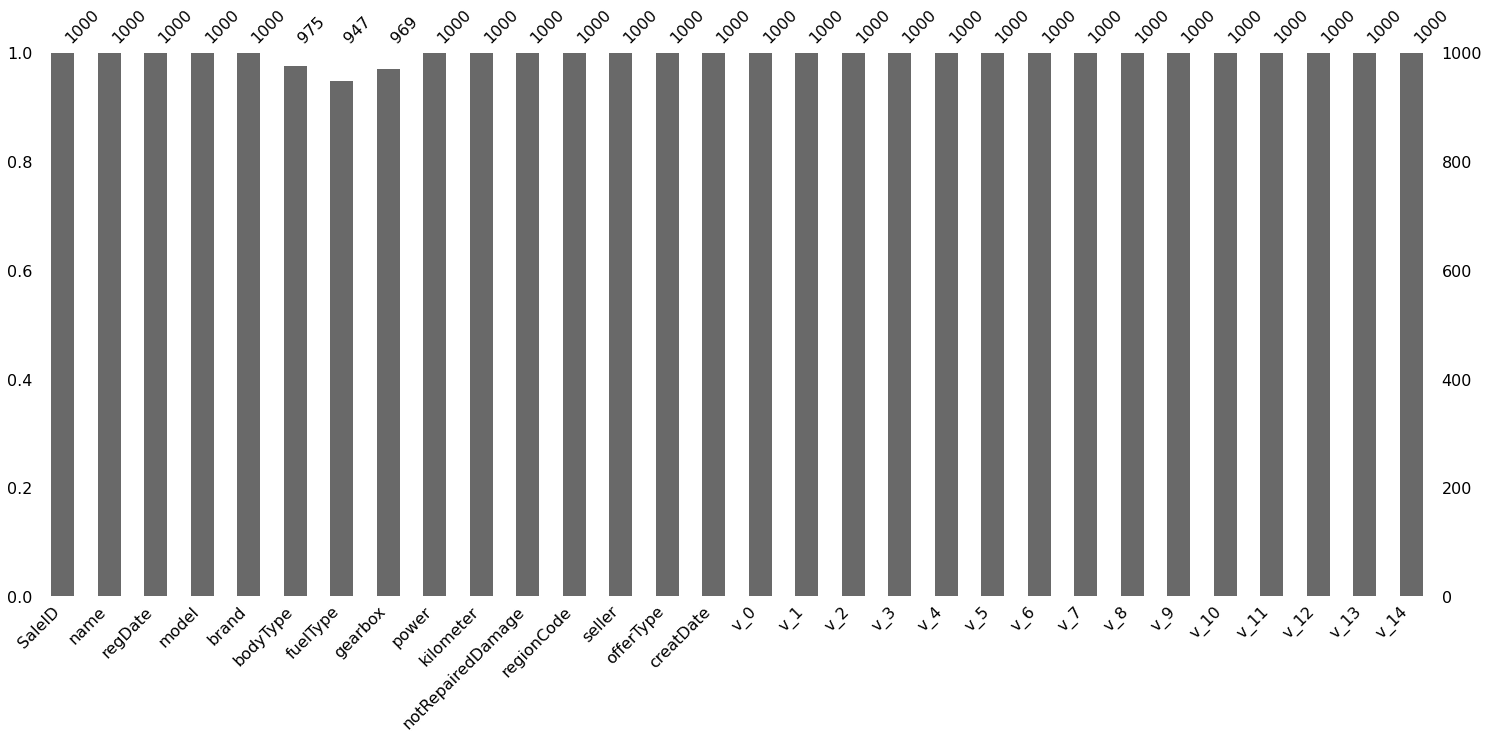

In [18]:
msno.bar(Test_data.sample(1000))

In [19]:
## 2) 查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

在pandas的DataFrame中，value_counts() 方法用于计算某一列中各个唯一值出现的频率，并返回一个Series对象，其中索引是唯一值，值是每个唯一值出现的次数。

当你对Train_data['notRepairedDamage']这一列使用value_counts()方法时，你正在查看这一列中所有不同值（比如，是否有未修复的损坏）的出现次数。

In [20]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

0.0 出现了 111361 次，这可能表示大多数车辆都没有未修复的损坏（假设0.0代表“无损坏”）。
“-” 出现了 24324 次，这是一个不寻常的表示方法。在大多数情况下，我们会期望使用NaN（表示缺失值）或者另一个明确的值（如2.0或'unknown'）来表示未知或不确定的损坏情况。但在这里，-可能被用作一种特殊的标记，可能表示数据不完整、未知或不适用于该字段。
1.0 出现了 14315 次，这可能表示有一部分车辆有未修复的损坏（假设1.0代表“有损坏”）。

将-视为缺失值：如果-确实表示数据缺失或未知，您可以将这些值替换为NaN，然后使用pandas的缺失值处理功能（如fillna()、dropna()等）来处理它们。

In [21]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [22]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [23]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [25]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [26]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [27]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

# 了解预测值的分布

In [28]:
Train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

当你对Train_data['price']列使用value_counts()方法时，你正在查看该列中所有不同价格值（或价格范围，如果数据是分组或四舍五入的话）的出现次数。这将返回一个Series对象，其中索引是唯一的价格值（或分组后的价格值），值是每个价格值（或分组）出现的次数。

然而，需要注意的是，如果price列包含大量的唯一值（即每辆车都有一个独特的价格），那么value_counts()的结果可能会非常长，并且不太可能提供太多有用的见解，除非你正在寻找一些特定的价格模式或异常值。

In [34]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
9395        1
81900       1
16699       1
11998       1
14780       1
Name: price, Length: 3763, dtype: int64

约翰逊SU分布（Johnson SU Distribution）：
约翰逊SU分布是一种四参数变换，用于将任意有界或无界的连续数据转换为正态分布。这种变换特别有用，因为它可以处理那些不能直接通过简单的线性变换转换为正态分布的数据。约翰逊SU分布由四个参数定义：γ（gamma）、ξ（xi）、λ（lambda）和ε（epsilon），其中γ和ξ用于位置和平移变换，λ和ε用于形状变换。尽管它很灵活，但计算可能相对复杂，且参数估计可能需要专门的软件或算法。

正态分布（Normal Distribution）：
正态分布，也称为高斯分布，是一种在自然界和社会科学中广泛存在的连续概率分布。它由一个均值（μ）和一个标准差（σ）完全定义。正态分布曲线是关于其均值对称的，且其形状由标准差决定：标准差越大，曲线越扁平；标准差越小，曲线越陡峭。正态分布因其简洁性和对许多自然现象的准确描述而备受青睐。
对数正态分布（Log-Normal Distribution）：

对数正态分布是当随机变量的对数服从正态分布时，该随机变量本身所服从的分布。换句话说，如果X是一个对数正态分布的随机变量，那么ln(X)是一个正态分布的随机变量。对数正态分布通常用于描述那些增长过程（如股票价格、人口增长等），其中增长速率本身可能具有正态分布的特性。对数正态分布的偏斜度总是正的，即其分布曲线向右偏斜，这反映了增长过程中的正偏态特性。

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

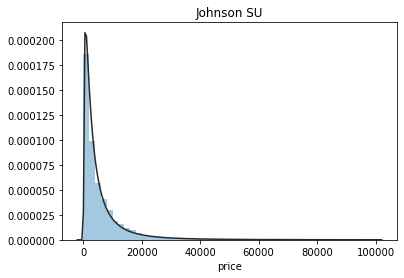

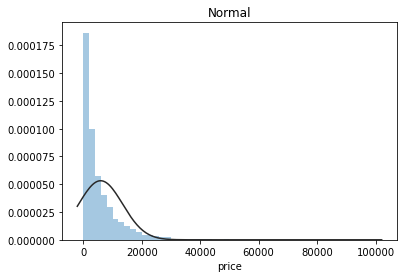

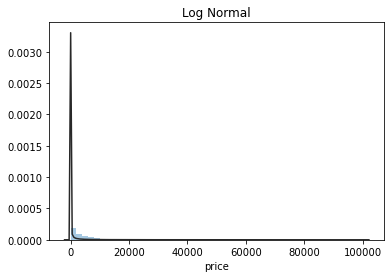

In [35]:
## 1) 总体分布概况（约翰逊SU分布（Johnson SU）、正态分布（Normal）和对数正态分布（Log Normal））
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

在您提供的代码中，您首先使用seaborn的distplot函数（尽管该函数在较新版本的seaborn中已被弃用，建议使用displot或histplot）来可视化Train_data['price']的分布，然后计算并打印了价格数据的偏度（Skewness）和峰度（Kurtosis）。这两个统计量提供了关于数据分布形状的重要信息。

偏度（Skewness）衡量了数据分布的偏斜方向和程度。如果偏度为0，则数据分布是对称的；如果偏度大于0，则分布向右偏斜（正偏态），意味着数据的右尾更长；如果偏度小于0，则分布向左偏斜（负偏态），意味着数据的左尾更长。

峰度（Kurtosis）衡量了数据分布的尖锐程度或峰态。正态分布的峰度为0（在某些定义中，为3减去峰度的实际值以得到与正态分布比较的峰度）。如果峰度大于0，则分布比正态分布更尖锐，有更多的极端值；如果峰度小于0，则分布比正态分布更平坦，极端值较少。

Skewness: 3.346487
Kurtosis: 18.995183


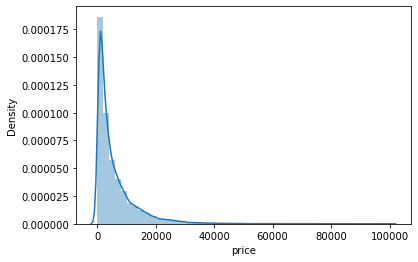

In [36]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

在Pandas中，DataFrame.skew() 和 DataFrame.kurt() 方法分别用于计算DataFrame中每列的偏度（Skewness）和峰度（Kurtosis）。但是，当你直接对Train_data.skew()或Train_data.kurt()进行调用时，你会得到一个Series，其中包含了Train_data中每列的偏度和峰度值，而不是单个值。

In [37]:
Train_data.skew(), Train_data.kurt()

(SaleID                0.000000
 name                  0.557606
 regDate               0.028495
 model                 1.484388
 brand                 1.150760
 bodyType              0.991530
 fuelType              1.595486
 gearbox               1.317514
 power                65.863178
 kilometer            -1.525921
 notRepairedDamage     2.430640
 regionCode            0.688881
 creatDate           -79.013310
 price                 3.346487
 v_0                  -1.316712
 v_1                   0.359454
 v_2                   4.842556
 v_3                   0.106292
 v_4                   0.367989
 v_5                  -4.737094
 v_6                   0.368073
 v_7                   5.130233
 v_8                   0.204613
 v_9                   0.419501
 v_10                  0.025220
 v_11                  3.029146
 v_12                  0.365358
 v_13                  0.267915
 v_14                 -1.186355
 dtype: float64,
 SaleID                 -1.200000
 name                

在seaborn库中，distplot函数（尽管在较新版本的seaborn中已被弃用）通常用于绘制数据的分布图，而不是直接用于绘制偏度（Skewness）的统计值。偏度是一个单一的数值，表示数据分布的偏斜程度，而不是一个可以绘制成分布图的数据集。

然而，如果你想要以某种方式可视化Train_data中每列的偏度，你可以将偏度计算为一个Series，并使用seaborn的绘图函数（如barplot）来绘制它。但是，请注意，axlabel不是distplot函数的有效参数；它可能是一个误用或与其他函数混淆了。

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

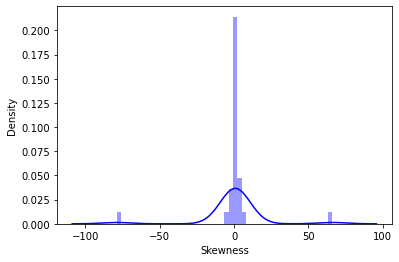

In [38]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

<AxesSubplot:xlabel='Kurtness', ylabel='Density'>

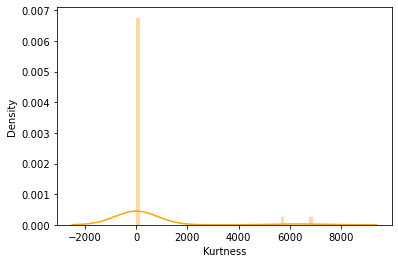

In [39]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

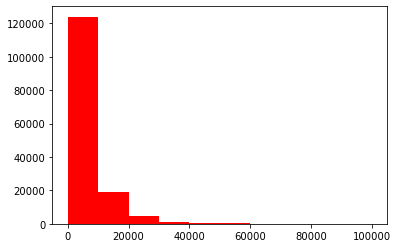

In [40]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

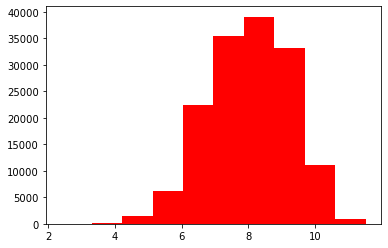

In [41]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

# 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [42]:
# 分离label即预测值
Y_train = Train_data['price']
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

定义了两组特征：numeric_features（数值型特征）和categorical_features（分类特征），并计划查看分类特征的独特值（unique values）分布。这是数据预处理和分析中的一个重要步骤，因为它可以帮助您了解数据的多样性和可能的处理需求（如编码分类变量）。

您的代码片段已经很好地设置了循环来遍历分类特征，并打印出每个特征的独特值数量以及这些独特值在数据集中的分布情况。

In [44]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
119983      1
63443       1
104410      1
154956      1
177672      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

name特征：
name特征有37453个不同的值，这意味着数据中的每个车辆名称都可能是唯一的，或者至少是非常多样化的。这通常不适合直接用作机器学习模型的输入，因为会导致非常高的维度和稀疏性。通常需要对这类特征进行进一步的处理，如使用词嵌入、TF-IDF编码或进行分组/聚类。

model特征：
model特征有247个不同的值，相对于name来说要少得多。这可能是因为不同的车型（model）虽然各有特色，但总体上数量还是有限的。这个特征可能对于预测车辆价格、性能等方面有一定价值。

brand特征：
brand特征有40个不同的值，表示不同的汽车品牌。这个特征对于预测车辆价格、受欢迎程度等方面可能非常有用，因为品牌通常与车辆的质量和价格紧密相关。

bodyType特征：
bodyType特征有8个不同的值，可能代表不同的车身类型（如轿车、SUV、MPV等）。这个特征对于理解车辆的类型和用途很有帮助，也可能对价格预测有所影响。

fuelType特征：
fuelType特征有7个不同的值，代表不同的燃料类型（如汽油、柴油、混合动力等）。这个特征对于预测车辆的燃油效率、环保性能等方面很重要。

gearbox特征：
gearbox特征只有2个不同的值，通常代表手动（0.0）和自动（1.0）变速箱。这个特征对于预测车辆的驾驶体验、燃油效率等方面可能有影响。

notRepairedDamage特征：
notRepairedDamage特征也有2个不同的值，可能表示车辆是否有未修复的损坏（0.0表示无损坏，1.0表示有损坏）。这个特征对于评估车辆的实际价值和潜在维修成本很重要。

regionCode特征：
regionCode特征有6971个不同的值，可能表示车辆所在的不同地区或销售区域。虽然这个特征可能包含有用的地理位置信息，但如此多的独特值可能需要进行一些处理（如聚类或编码）才能在模型中使用。

In [45]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55        97
708       96
387       95
1541      88
713       74
          ..
18105      1
20777      1
102565     1
103258     1
193384     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
240.0       1
242.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
19      450
20      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特

# 数字特征分析

In [47]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price',
 'price']

In [48]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [49]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

TypeError: sort_values() missing 1 required positional argument: 'by'

您提供的代码片段旨在使用Matplotlib和Seaborn库来创建一个热图，该热图展示了数值特征与某个目标特征（可能是“价格”）之间的相关性。

<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

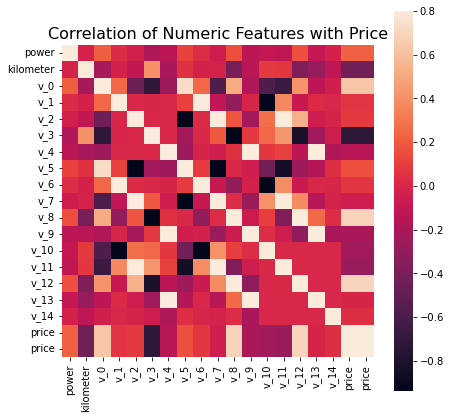

In [50]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [51]:
del price_numeric['price']

In [52]:
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00
price           Skewness: 03.35     Kurtosis:

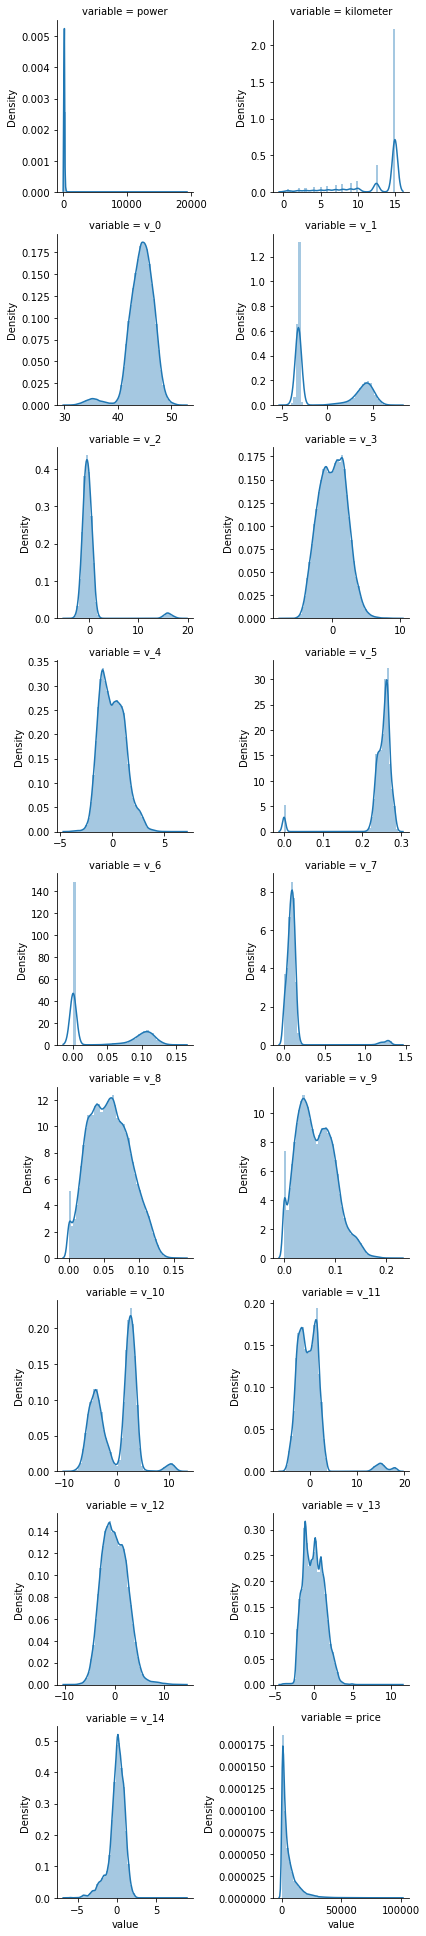

In [53]:
## 3) 每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

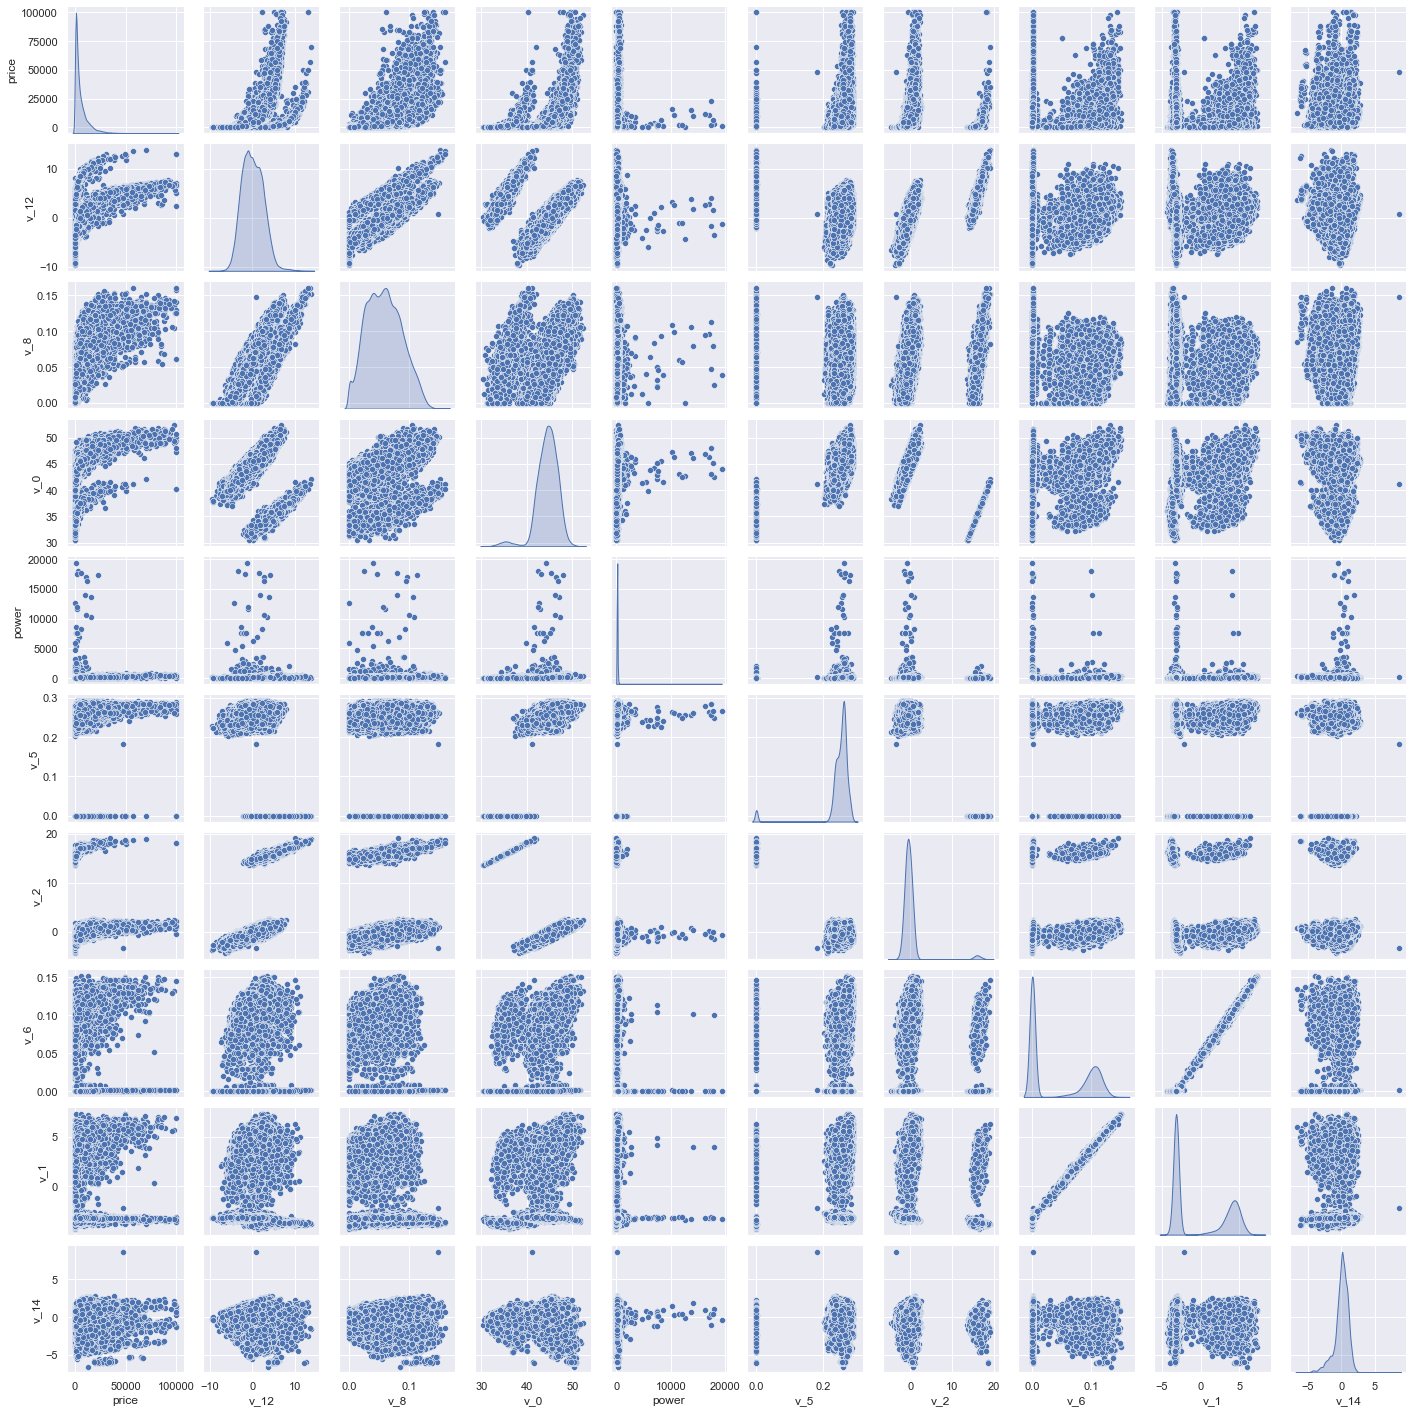

In [54]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [56]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [57]:
Y_train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

<AxesSubplot:xlabel='v_13', ylabel='price'>

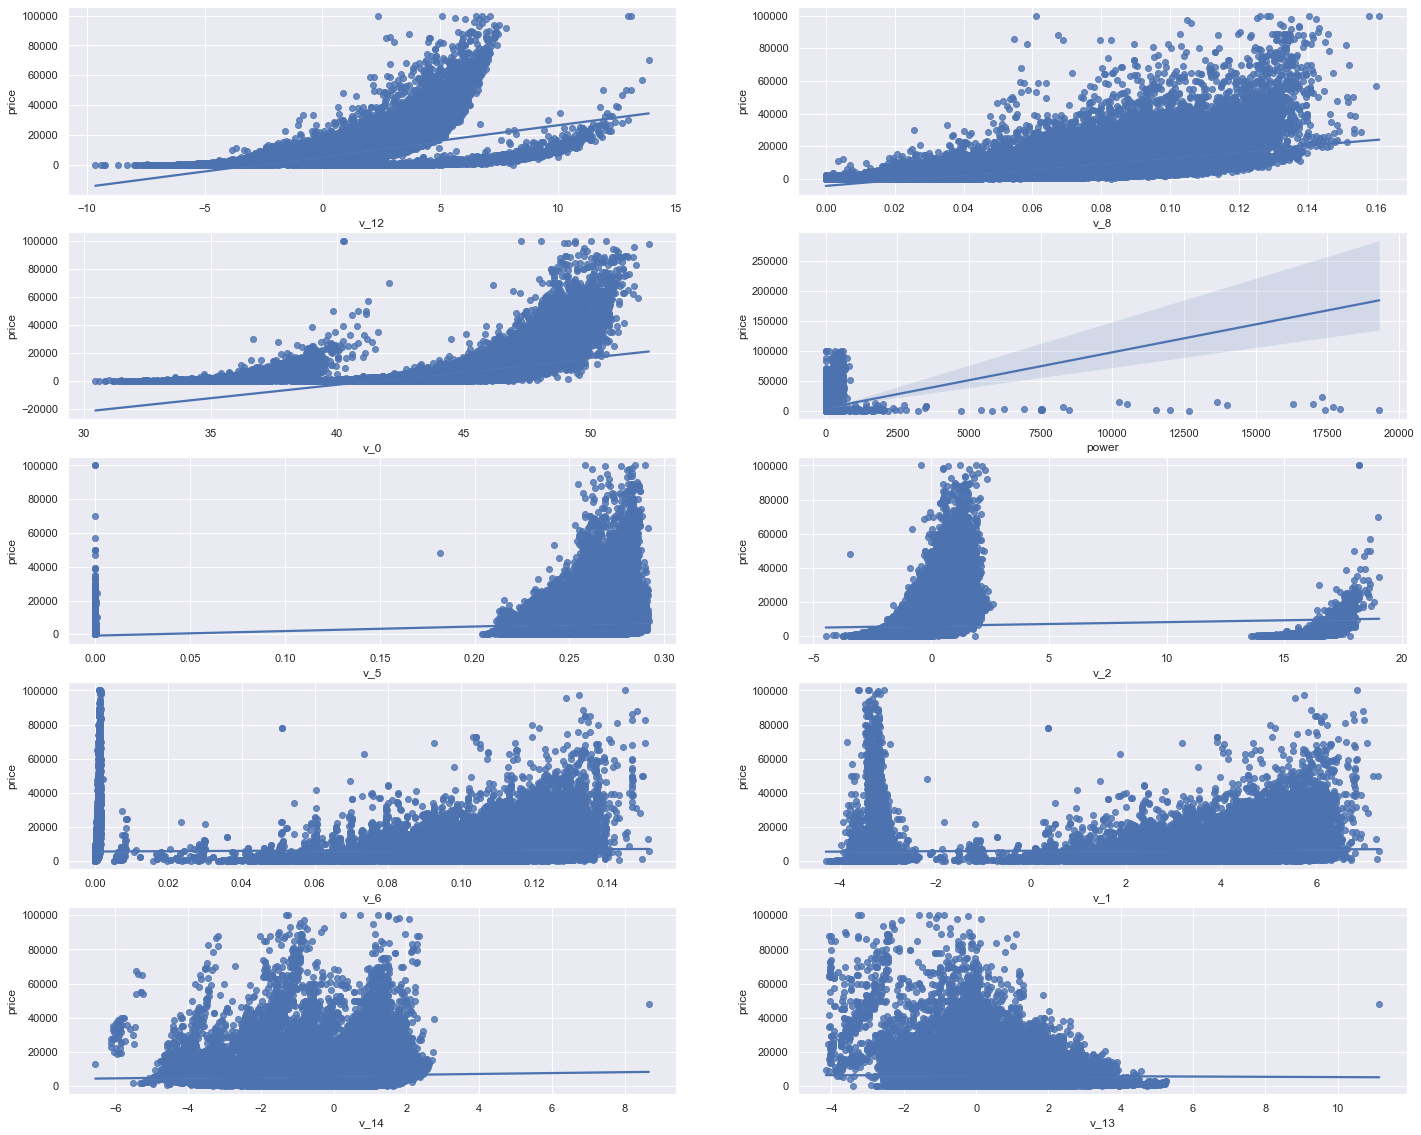

In [58]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

# 类别特征分析

In [59]:
## 1) unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [60]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

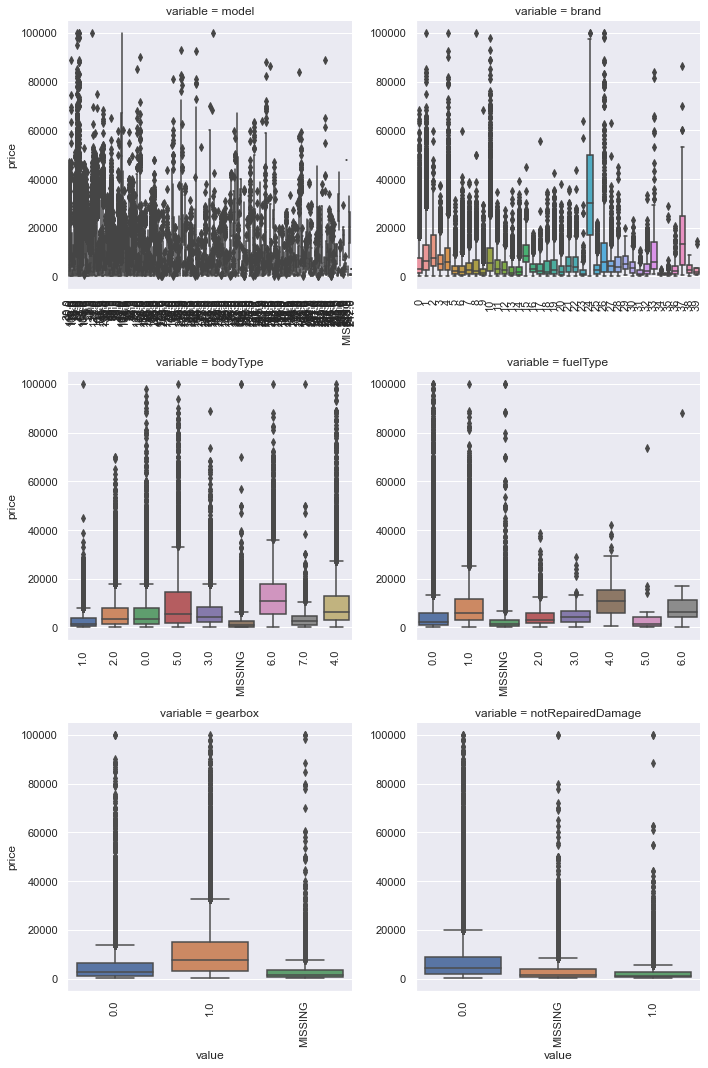

In [61]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")